# Import

In [ ]:
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly import subplots
import plotly
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sn

import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow import keras

import numpy as np
from tqdm.auto import tqdm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from mlxtend.plotting import plot_decision_regions

from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

# prepare data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip -q '/content/drive/MyDrive/data_set.zip'

In [ ]:
import tensorflow as tf
ImageDataGenerator = tf.keras.preprocessing.image.ImageDataGenerator
train_gen = ImageDataGenerator(rescale =255.0)

val_gen = ImageDataGenerator(rescale =255.0)
test_gen = ImageDataGenerator(rescale =255.0)

In [ ]:
train=train_gen.flow_from_directory('/content/data_set/trian',
                                  batch_size=64,
                                  target_size=(224, 224),
                                  color_mode='rgb',
                                  class_mode='categorical',
                                  shuffle=True )


Found 2100 images belonging to 3 classes.


In [ ]:
val=val_gen.flow_from_directory('/content/data_set/val',
                                  batch_size=64,
                                  target_size=(224, 224),
                                  color_mode='rgb',
                                  class_mode='categorical',
                                  shuffle=True )

Found 600 images belonging to 3 classes.


In [ ]:
test=test_gen.flow_from_directory('/content/data_set/test',
                                  batch_size=1,
                                  target_size=(224, 224),
                                  color_mode='rgb',
                                  class_mode='sparse',
                                  shuffle=False )

Found 600 images belonging to 3 classes.


In [ ]:
class_names = ['Covid','Nomal','Viral Pneumonia']
class_names

['Covid', 'Nomal', 'Viral Pneumonia']

# function

In [ ]:
def plot_graph(history):
  tr_acc = history.history['accuracy']
  tr_loss = history.history['loss']
  val_acc = history.history['val_accuracy']
  val_loss = history.history['val_loss']
  index_loss = np.argmin(val_loss)
  val_lowest = val_loss[index_loss]
  index_acc = np.argmax(val_acc)
  acc_highest = val_acc[index_acc]
  Epochs = [i+1 for i in range(len(tr_acc))]
  loss_label = f'best epoch= {str(index_loss + 1)}'
  acc_label = f'best epoch= {str(index_acc + 1)}'
  # Plot training history
  plt.figure(figsize= (20, 8))
  plt.style.use('fivethirtyeight')
  plt.subplot(1, 2, 1)
  plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
  plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
  plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
  plt.title('Training and Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.subplot(1, 2, 2)
  plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
  plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
  plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
  plt.title('Training and Validation Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.tight_layout
  plt.show()

In [ ]:
 def ytester(model,test):
  y_pred = []
  y_test = []
  for i in range(len(test)):
    result = model.predict(test[i][0],verbose=0)
    y_pred.append(np.argmax(result))
    y_test.append(test[i][1])

  y_pred = np.array(y_pred)
  y_test = np.array(y_test)
  return y_test,y_pred

# Model

## experiment model

In [ ]:
# model = Sequential()
model = tf.keras.Sequential()

#1. CNN LAYER
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', input_shape=(224, 224, 3),activation='relu'))
model.add(tf.keras.layers.Activation("relu"))

#2. CNN LAYER
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same'))
model.add(tf.keras.layers.Activation("relu"))

model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

#FULLY CONNECTED LAYER
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256))
model.add(tf.keras.layers.Activation("relu"))

#OUTPUT LAYER
model.add(tf.keras.layers.Dense(3, activation='softmax'))
optimizer = tf.keras.optimizers.Adam()
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 activation (Activation)     (None, 224, 224, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 401408)            0         
                                                        

In [ ]:
NO_EPOCHS = 25

history1 = model.fit(train,
                   epochs=NO_EPOCHS, validation_data = val,
                   verbose=1,batch_size = 16)

Epoch 1/25
33/33 [==============================] - 27s 449ms/step - loss: 655993.7500 - accuracy: 0.5867 - val_loss: 97.5679 - val_accuracy: 0.8317
Epoch 2/25
33/33 [==============================] - 10s 295ms/step - loss: 26.1491 - accuracy: 0.8610 - val_loss: 25.3101 - val_accuracy: 0.8483
Epoch 3/25
33/33 [==============================] - 10s 300ms/step - loss: 5.3773 - accuracy: 0.9052 - val_loss: 22.6134 - val_accuracy: 0.8283
Epoch 4/25
33/33 [==============================] - 10s 304ms/step - loss: 0.9998 - accuracy: 0.9495 - val_loss: 21.1619 - val_accuracy: 0.8367
Epoch 5/25
33/33 [==============================] - 11s 338ms/step - loss: 0.4263 - accuracy: 0.9610 - val_loss: 21.3074 - val_accuracy: 0.8333
Epoch 6/25
33/33 [==============================] - 13s 388ms/step - loss: 0.3234 - accuracy: 0.9624 - val_loss: 22.1172 - val_accuracy: 0.8250
Epoch 7/25
33/33 [==============================] - 10s 308ms/step - loss: 0.1328 - accuracy: 0.9643 - val_loss: 21.5733 - val_acc

## Best model

In [ ]:
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = 3


base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top= False, weights= "imagenet", input_shape= img_shape, pooling= 'max')

model2 = tf.keras.Sequential([
    base_model,
    BatchNormalization(axis= -1, momentum= 0.99, epsilon= 0.001),
    Dense(256, kernel_regularizer= regularizers.l2(l= 0.016), activity_regularizer= regularizers.l1(0.006),
                bias_regularizer= regularizers.l1(0.006), activation= 'relu'),
    Dropout(rate= 0.45, seed= 123),
    Dense(class_count, activation= 'softmax')
])

model2.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model2.summary()

16705208/16705208 [==============================] - 0s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 1280)              4049571   
 )                                                               
                                                                 
 batch_normalization (Batch  (None, 1280)              5120      
 Normalization)                                                  
                                                                 
 dense_2 (Dense)             (None, 256)               327936    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 3)                 771       
                                                       

In [ ]:
batch_size = 20   # set batch size for training
epochs =  20  # number of all epochs in training

history2 = model2.fit(x= train, epochs= epochs, verbose= 1, validation_data= val,
                     shuffle= False)

Epoch 1/20
33/33 [==============================] - 69s 991ms/step - loss: 7.2756 - accuracy: 0.8643 - val_loss: 10.5882 - val_accuracy: 0.3317
Epoch 2/20
33/33 [==============================] - 19s 567ms/step - loss: 5.6202 - accuracy: 0.9567 - val_loss: 5.6132 - val_accuracy: 0.6883
Epoch 3/20
33/33 [==============================] - 20s 597ms/step - loss: 4.5029 - accuracy: 0.9776 - val_loss: 4.2330 - val_accuracy: 0.9150
Epoch 4/20
33/33 [==============================] - 19s 574ms/step - loss: 3.7087 - accuracy: 0.9886 - val_loss: 3.4814 - val_accuracy: 0.9550
Epoch 5/20
33/33 [==============================] - 20s 590ms/step - loss: 3.1029 - accuracy: 0.9943 - val_loss: 2.9229 - val_accuracy: 0.9600
Epoch 6/20
33/33 [==============================] - 19s 574ms/step - loss: 2.6233 - accuracy: 0.9938 - val_loss: 2.4719 - val_accuracy: 0.9700
Epoch 7/20
33/33 [==============================] - 20s 590ms/step - loss: 2.2266 - accuracy: 0.9976 - val_loss: 2.0941 - val_accuracy: 0.970

# ผลการทดลอง

## experiment model

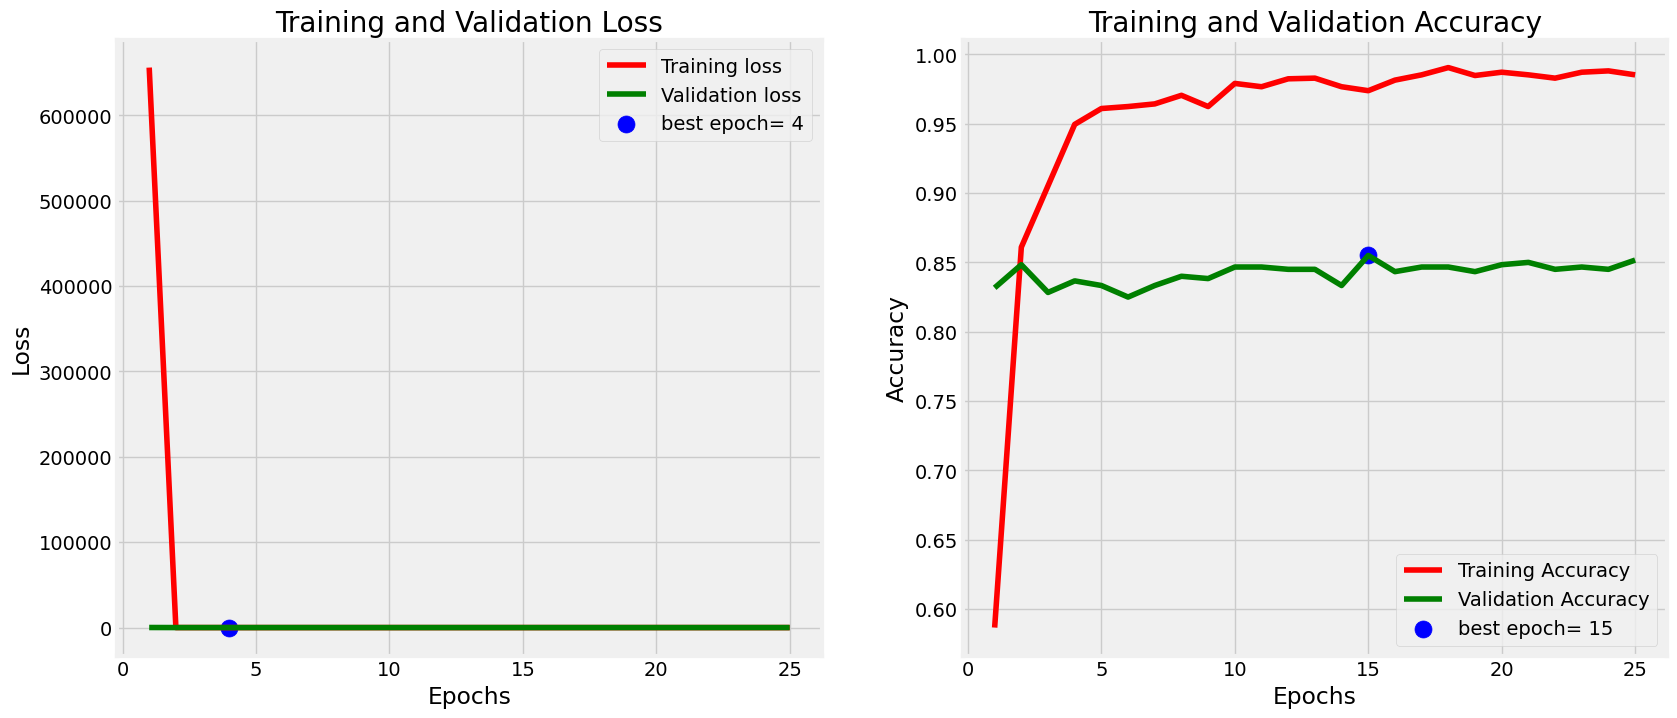

In [ ]:
plot_graph(history1)

In [ ]:
y_test,y_pred1,y_pob1 = ytester(model,test)

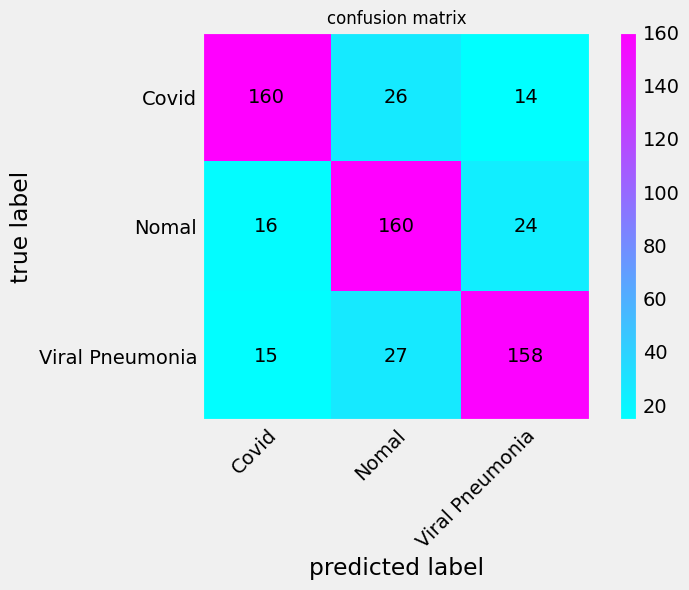

              precision    recall  f1-score   support

         0.0       0.84      0.80      0.82       200
         1.0       0.75      0.80      0.77       200
         2.0       0.81      0.79      0.80       200

    accuracy                           0.80       600
   macro avg       0.80      0.80      0.80       600
weighted avg       0.80      0.80      0.80       600

0.7966666666666666


In [ ]:
cm = confusion_matrix(y_test , y_pred1)
plot_confusion_matrix(conf_mat=cm,class_names=class_names,colorbar=True,cmap= 'cool',fontcolor_threshold=2)
#plt.tight_layout()
sn.set_theme(style='ticks')
plt.title("confusion matrix")
#plt.savefig('P.png')
plt.show()
print(classification_report(y_test,y_pred1))
s1 = accuracy_score(y_test,y_pred1)
print(s1)

## Best model

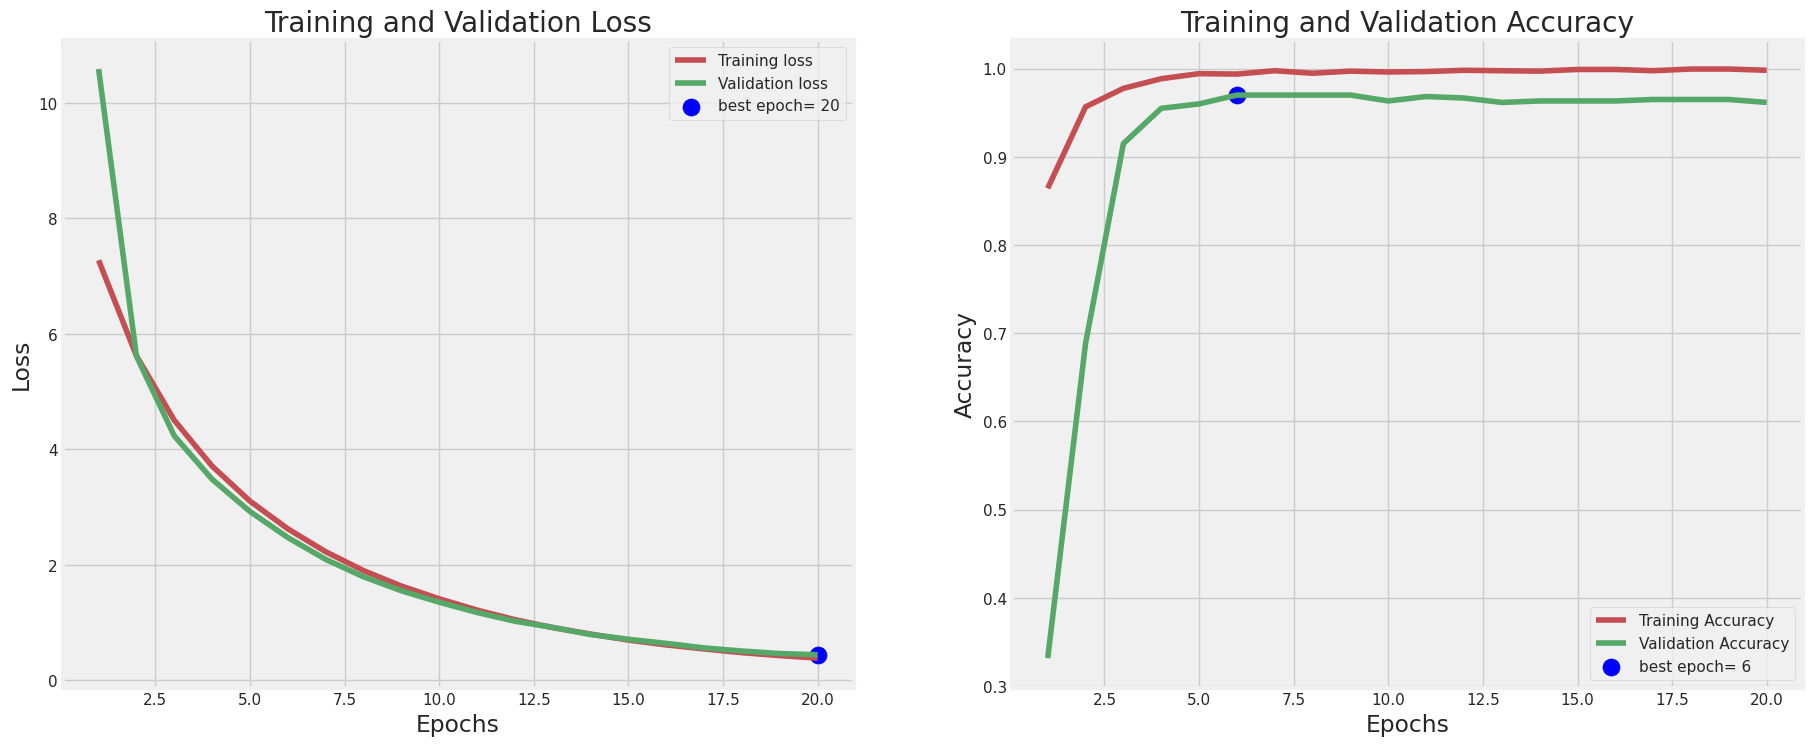

In [ ]:
plot_graph(history2)

In [ ]:
y_test,y_pred2,y_pob2 = ytester(model2,test)

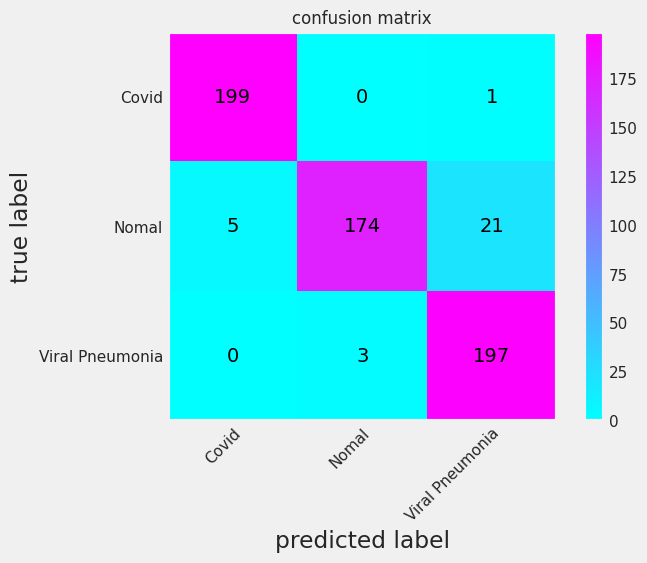

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       200
         1.0       0.98      0.87      0.92       200
         2.0       0.90      0.98      0.94       200

    accuracy                           0.95       600
   macro avg       0.95      0.95      0.95       600
weighted avg       0.95      0.95      0.95       600

0.95


In [ ]:
cm = confusion_matrix(y_test , y_pred2)
plot_confusion_matrix(conf_mat=cm,class_names=class_names,colorbar=True,cmap= 'cool',fontcolor_threshold=2)
#plt.tight_layout()
sn.set_theme(style='ticks')
plt.title("confusion matrix")
#plt.savefig('P.png')
plt.show()
print(classification_report(y_test,y_pred2))
s2 = accuracy_score(y_test,y_pred2)
print(s2)

In [ ]:
from sklearn.metrics import log_loss

# comparation

Text(0.5, 8.249999999999973, 'Method')

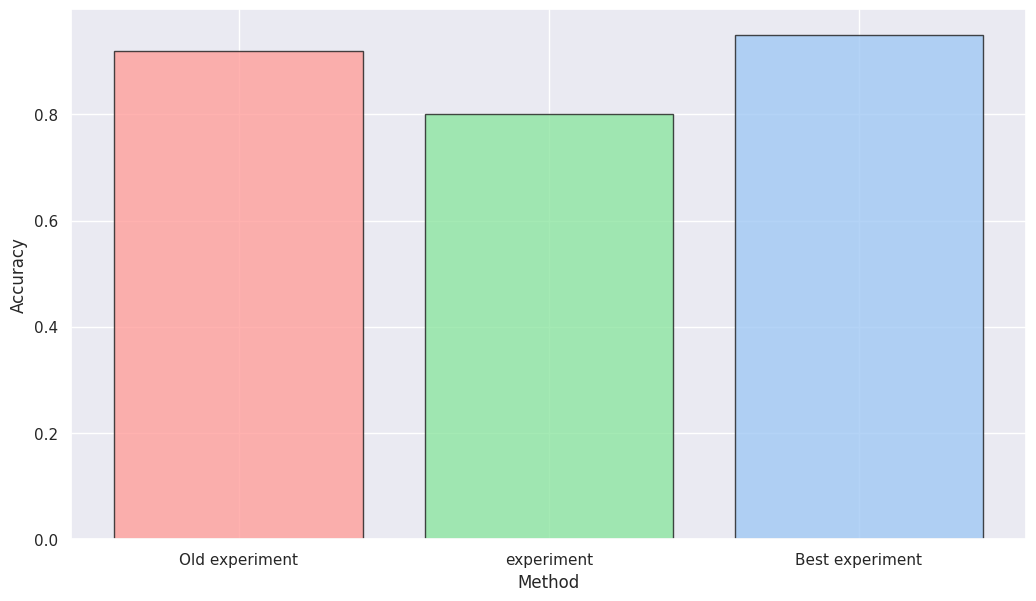

In [ ]:
plt.figure(figsize=[30,6])

sn.set_theme(style='darkgrid',palette="pastel")
name = ['Old experiment','experiment','Best experiment']
plt.subplot(1,3,1)
plt.tight_layout()
plt.bar(name,[0.92,s1.round(2), s2.round(2)],color=['r','g','b'],alpha=0.8,linewidth=1,edgecolor='k')
plt.ylabel('Accuracy')
plt.xlabel('Method')